In [1]:
from re import S
import pennylane as qml
from pennylane import numpy as np
from pennylane.templates import RandomLayers
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Create a quantum circuit
dev = qml.device("qiskit.aer", wires=4)
@qml.qnode(dev)
def circuit(phi, rand_params):
    # Encoding of 4 classical input values
    for j in range(4):
        qml.RY(np.pi * phi[j], wires=j)

    # Random quantum circuit
    RandomLayers(rand_params, wires=list(range(4)))

    # Measurement producing 4 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(4)]

In [10]:
n_layers = 25

In [11]:
np.random.seed(123)  # Seed for NumPy random number generator
rand_params = np.random.uniform(
    high=2 * np.pi, size=(n_layers, 4)
) 
phi = [0.25*np.pi, 0.25*np.pi, 0.25*np.pi, 0.25*np.pi]

In [12]:
circuit(phi, rand_params)

tensor([ 0.06835938, -0.01171875,  0.375     ,  0.18164062], requires_grad=True)

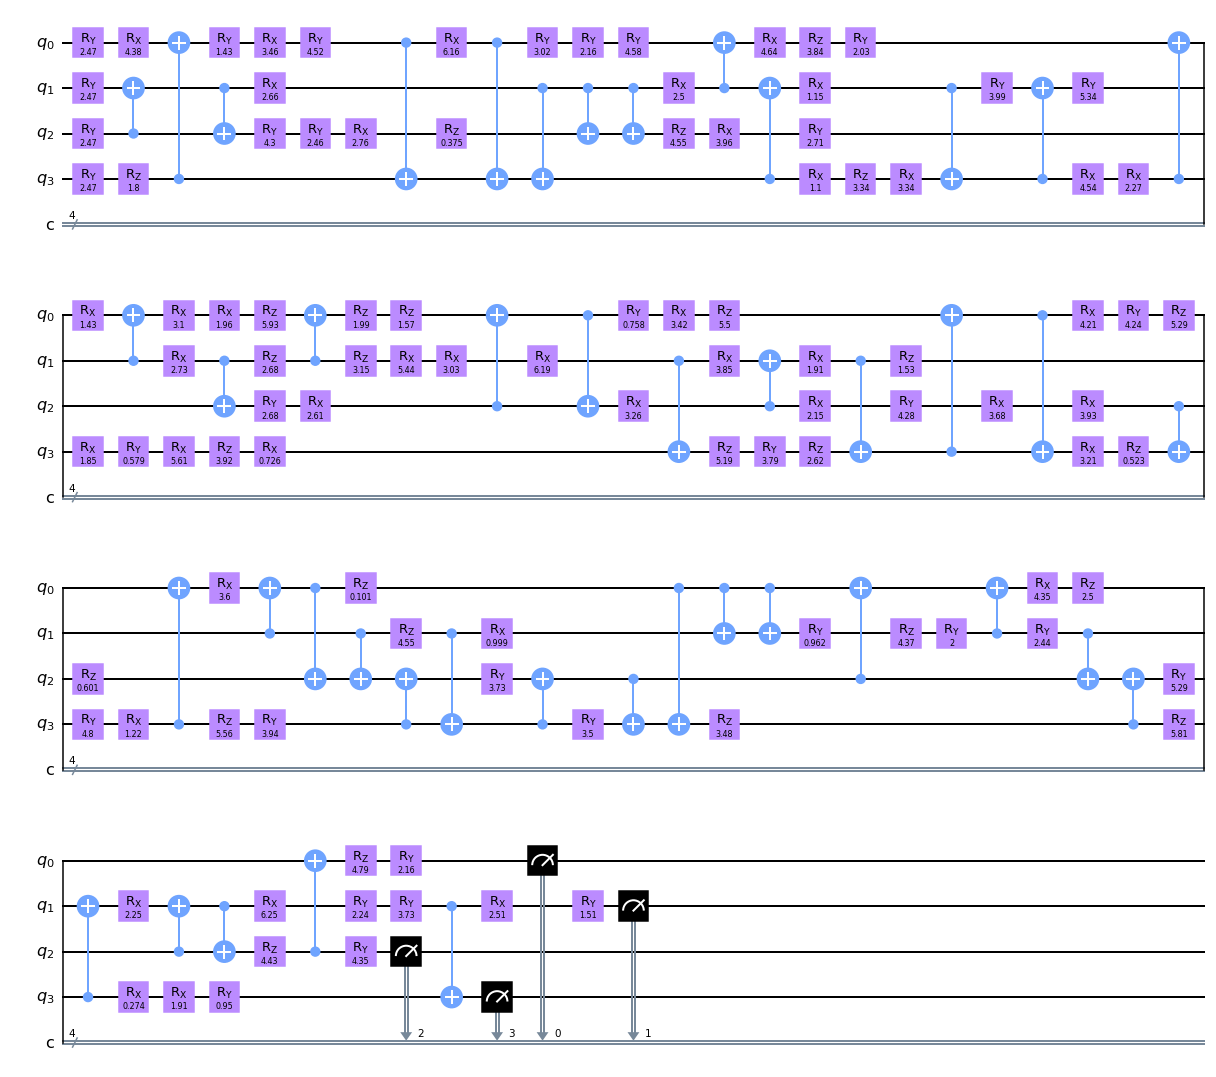

In [13]:
dev._circuit.draw(output='mpl')